# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [8]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from scipy.ndimage import filters, gaussian_filter, gaussian_filter1d
from sklearn.preprocessing import binarize
from numpy import logical_and

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [9]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

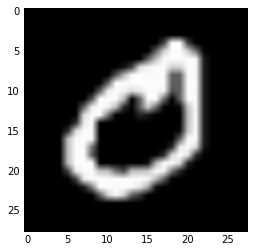

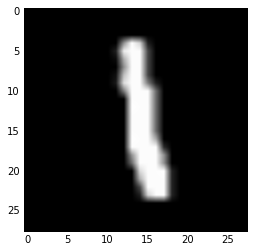

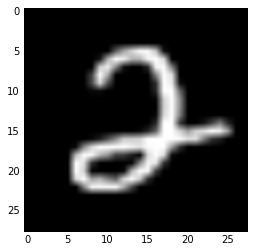

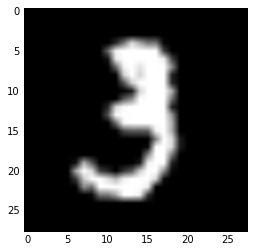

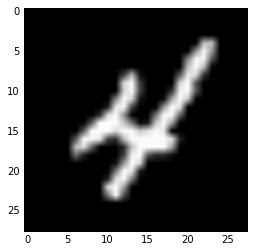

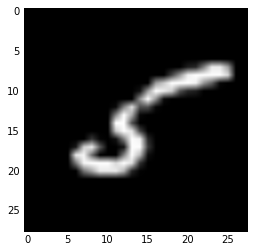

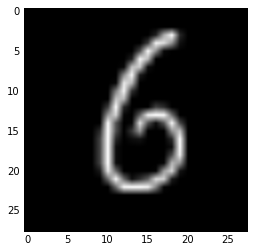

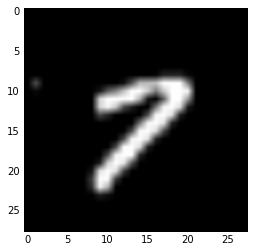

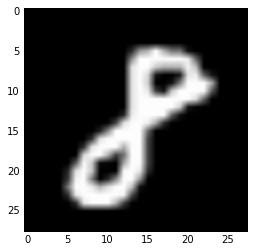

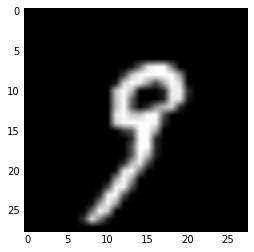

In [10]:
def P1(num_examples=10):

### STUDENT START ###

#pull examples from each digit and subset number of examples specified
    X_0 = mnist['data'][np.where(mnist['target'] == 0.)][1:(num_examples + 1)]
    X_1 = mnist['data'][np.where(mnist['target'] == 1.)][1:(num_examples + 1)]
    X_2 = mnist['data'][np.where(mnist['target'] == 2.)][1:(num_examples + 1)]
    X_3 = mnist['data'][np.where(mnist['target'] == 3.)][1:(num_examples + 1)]
    X_4 = mnist['data'][np.where(mnist['target'] == 4.)][1:(num_examples + 1)]
    X_5 = mnist['data'][np.where(mnist['target'] == 5.)][1:(num_examples + 1)]
    X_6 = mnist['data'][np.where(mnist['target'] == 6.)][1:(num_examples + 1)]
    X_7 = mnist['data'][np.where(mnist['target'] == 7.)][1:(num_examples + 1)]
    X_8 = mnist['data'][np.where(mnist['target'] == 8.)][1:(num_examples + 1)]
    X_9 = mnist['data'][np.where(mnist['target'] == 9.)][1:(num_examples + 1)]
    
# combine all arrays into one array
    X_sample = np.concatenate((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9))

# plot the examples in 28x28 grid
    for i in X_sample:
        array = np.array(i, dtype='uint8')
        array = array.reshape((28, 28))
        plt.imshow(array, cmap='gray')
        plt.show()

### STUDENT END ###

P1(1)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [12]:
def P2(k_values):

### STUDENT START ###
# use the sklearn KNeighborsClassifier to model and predict
    
    for i in k_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(mini_train_data, mini_train_labels)
        dev_predicted_labels = model.predict(dev_data)
        target_names = ['digit 0','digit 1','digit 2','digit 3','digit 4','digit 5','digit 6','digit 7','digit 8','digit 9']
        
        #use sklearn accuracy score calculation
        print "Accuracy Score with k_NearestNeighbors for k = " + str(i) + " is " + str(accuracy_score(dev_labels, dev_predicted_labels))
        print "Classification Report with k_NearestNeighbors for k = " + str(i) + "."
        print classification_report(dev_labels, dev_predicted_labels, target_names=target_names)

    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy Score with k_NearestNeighbors for k = 1 is 0.888
Classification Report with k_NearestNeighbors for k = 1.
             precision    recall  f1-score   support

    digit 0       0.91      0.98      0.94        99
    digit 1       0.89      1.00      0.94       105
    digit 2       0.99      0.79      0.88       102
    digit 3       0.77      0.87      0.82        86
    digit 4       0.89      0.82      0.85       104
    digit 5       0.93      0.84      0.88        91
    digit 6       0.94      0.96      0.95        98
    digit 7       0.89      0.92      0.90       113
    digit 8       0.94      0.88      0.91        96
    digit 9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy Score with k_NearestNeighbors for k = 3 is 0.878
Classification Report with k_NearestNeighbors for k = 3.
             precision    recall  f1-score   support

    digit 0       0.90      1.00      0.95        99
    digit 1       0.81  

ANSWER: Digit 9 is the most difficult to predict.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [16]:
def P3(train_sizes):

### STUDENT START ###
# start the timer for each loop, subset for each train size and print accuracy and time taken
    start = time.time()
    for i in train_sizes:
        p3_data, p3_labels = X[:i], Y[:i]
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(p3_data, p3_labels)
        dev_predicted_labels = model.predict(dev_data)
        print "Accuracy Score with Train Size = " + str(i) + "."
        print accuracy_score(dev_labels, dev_predicted_labels)
        print "total time taken this loop: ", time.time() - start
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
P3(train_sizes)

Accuracy Score with Train Size = 100.
0.72
total time taken this loop:  0.106281995773
Accuracy Score with Train Size = 200.
0.786
total time taken this loop:  0.312779188156
Accuracy Score with Train Size = 400.
0.841
total time taken this loop:  0.732312202454
Accuracy Score with Train Size = 800.
0.884
total time taken this loop:  1.58246517181
Accuracy Score with Train Size = 1600.
0.902
total time taken this loop:  3.34183716774
Accuracy Score with Train Size = 3200.
0.926
total time taken this loop:  7.05197000504
Accuracy Score with Train Size = 6400.
0.937
total time taken this loop:  14.6776030064
Accuracy Score with Train Size = 12800.
0.959
total time taken this loop:  29.9840741158
Accuracy Score with Train Size = 25000.
0.97
total time taken this loop:  63.8459591866


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [19]:
def P4():

### STUDENT START ###
    p4_data, p4_labels = X[:6000], Y[:6000]
    model = LinearRegression()
    model.fit(p4_data, p4_labels)
    dev_predicted_labels = model.predict(dev_data)
    dev_predicted_labels = np.absolute(dev_predicted_labels)
    dev_predicted_labels = dev_predicted_labels.astype(int)
    print "Accuracy Score with Train Size = " + str(6000) + " is " + str(accuracy_score(dev_labels, dev_predicted_labels))

### STUDENT END ###

P4()

Accuracy Score with Train Size = 6000 is 0.255


ANSWER: The linear model predicts decimals. I took that absolute value of the array and forced them to be integers.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
0.888


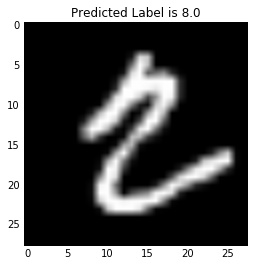

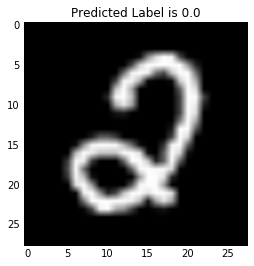

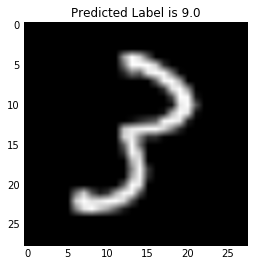

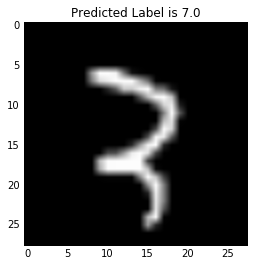

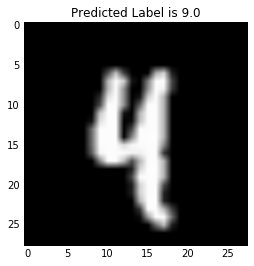

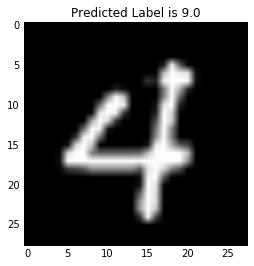

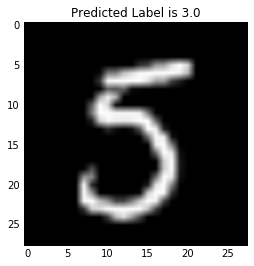

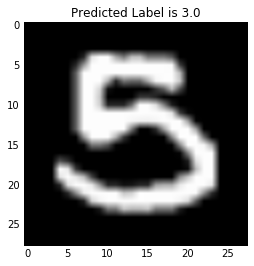

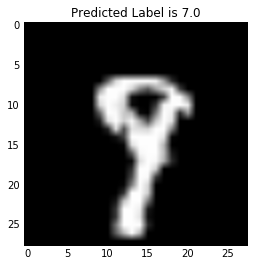

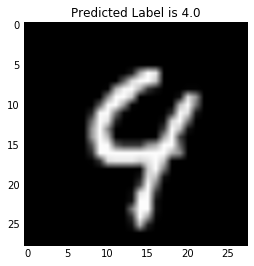

In [22]:
def P5():

### STUDENT START ###

#create the model, figure out which digits are misclassified most by looking at the confusion matrix
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    dev_predicted_labels = model.predict(dev_data)
    cm = confusion_matrix(dev_labels, dev_predicted_labels)
    accs = accuracy_score(dev_labels, dev_predicted_labels)
    print cm
    print accs
    mislabeled_data = dev_data[np.where(dev_labels != dev_predicted_labels)]
    mislabeled_labels = dev_predicted_labels[np.where(dev_labels != dev_predicted_labels)]
    mislabeled_actual = dev_labels[np.where(dev_labels != dev_predicted_labels)]
    mislabeled_data = mislabeled_data*255
    
#sample 2 from the top misclassified digits     
    mislabeled_data_2 = mislabeled_data[np.where(mislabeled_actual == 2.)][1:3]
    mislabeled_data_3 = mislabeled_data[np.where(mislabeled_actual == 3.)][1:3]
    mislabeled_data_4 = mislabeled_data[np.where(mislabeled_actual == 4.)][1:3]
    mislabeled_data_5 = mislabeled_data[np.where(mislabeled_actual == 5.)][1:3]
    mislabeled_data_9 = mislabeled_data[np.where(mislabeled_actual == 9.)][1:3]
    
    mislabeled_labels_2 = mislabeled_labels[np.where(mislabeled_actual == 2.)][1:3]
    mislabeled_labels_3 = mislabeled_labels[np.where(mislabeled_actual == 3.)][1:3]
    mislabeled_labels_4 = mislabeled_labels[np.where(mislabeled_actual == 4.)][1:3]
    mislabeled_labels_5 = mislabeled_labels[np.where(mislabeled_actual == 5.)][1:3]
    mislabeled_labels_9 = mislabeled_labels[np.where(mislabeled_actual == 9.)][1:3]
    
    mislabeled_data_sample = np.concatenate((mislabeled_data_2,mislabeled_data_3,mislabeled_data_4,mislabeled_data_5,mislabeled_data_9))
    mislabeled_labels_sample = np.concatenate((mislabeled_labels_2,mislabeled_labels_3,mislabeled_labels_4,mislabeled_labels_5,mislabeled_labels_9))

#plot the misclassified digits and label with the predicted digit
    for i, j in zip(mislabeled_data_sample, mislabeled_labels_sample):
        array = np.array(i, dtype='uint8')
        array = array.reshape((28, 28))
        plt.title('Predicted Label is {label}'.format(label=j))
        plt.imshow(array, cmap='gray')
        plt.show()
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

See some visual examples of blurring


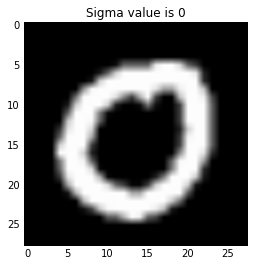

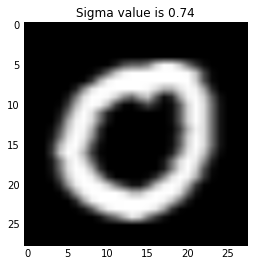

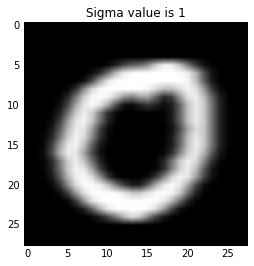

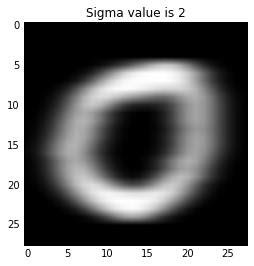

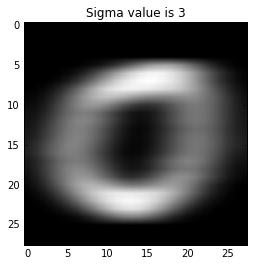

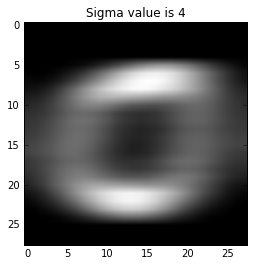

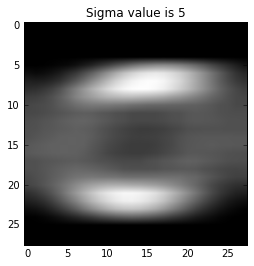

Preprocess the training data but not the dev data.
Accuracy Score for sigma = 0 is 0.888
Accuracy Score for sigma = 0.74 is 0.841
Accuracy Score for sigma = 1 is 0.765
Accuracy Score for sigma = 2 is 0.51
Accuracy Score for sigma = 3 is 0.393
Accuracy Score for sigma = 4 is 0.341
Accuracy Score for sigma = 5 is 0.253
Preprocess the dev data but not the training data.
Accuracy Score for sigma = 0 is 0.888
Accuracy Score for sigma = 0.74 is 0.77
Accuracy Score for sigma = 1 is 0.568
Accuracy Score for sigma = 2 is 0.244
Accuracy Score for sigma = 3 is 0.138
Accuracy Score for sigma = 4 is 0.107
Accuracy Score for sigma = 5 is 0.105
Preprocess both training and dev data.
Accuracy Score for sigma = 0 is 0.888
Accuracy Score for sigma = 0.74 is 0.711
Accuracy Score for sigma = 1 is 0.477
Accuracy Score for sigma = 2 is 0.211
Accuracy Score for sigma = 3 is 0.158
Accuracy Score for sigma = 4 is 0.165
Accuracy Score for sigma = 5 is 0.143


In [25]:
def P6():
    
### STUDENT START ###

#use gaussian_filter from scipy. A sigma of 0.74 while truncating at 2 is blurring by using the 8 neighboring pixels
#source: http://stackoverflow.com/questions/25216382/gaussian-filter-in-scipy

    #test of few weights for blurring and visualize
    sigmas = [0, 0.74, 1, 2, 3, 4, 5]
    print "See some visual examples of blurring"
    x = mini_train_data[np.where(mini_train_labels == 0.)][1:2]
    w = filters.gaussian_filter(x, sigma=0.74, truncate=2)
    y = filters.gaussian_filter(x, sigma=1, truncate=2)
    z = filters.gaussian_filter(x, sigma=2, truncate=2)
    a = filters.gaussian_filter(x, sigma=3, truncate=2)
    b = filters.gaussian_filter(x, sigma=4, truncate=2)
    c = filters.gaussian_filter(x, sigma=5, truncate=2)
    
    test = np.concatenate((x, w, y, z, a, b, c))
    test = test*255
    for i, j in zip(test, sigmas):
        array = np.array(i, dtype='uint8')
        array = array.reshape((28, 28))
        plt.title('Sigma value is {label}'.format(label=j))
        plt.imshow(array, cmap='gray')
        plt.show()
    
    # preprocess the training data, not the dev data
    print "Preprocess the training data but not the dev data."
    
    for i in sigmas:
        gmini_train_data = filters.gaussian_filter(mini_train_data, sigma=i, truncate=2)
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(gmini_train_data, mini_train_labels)
        dev_predicted_labels = model.predict(dev_data)
        accs = accuracy_score(dev_labels, dev_predicted_labels)
        print "Accuracy Score for sigma = " + str(i) + " " + "is" + " " + str(accs)
        
    # preprocess the dev data but not the training data
    print "Preprocess the dev data but not the training data."
    
    for i in sigmas:
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(mini_train_data, mini_train_labels)
        dev_predicted_labels = model.predict(filters.gaussian_filter(dev_data, sigma=i, truncate=2))
        accs = accuracy_score(dev_labels, dev_predicted_labels)
        print "Accuracy Score for sigma = " + str(i) + " " + "is" + " " + str(accs)
    
    # preprocess both training and dev data
    print "Preprocess both training and dev data."
    
    for i in sigmas:
        gmini_train_data = filters.gaussian_filter(mini_train_data, sigma=i, truncate=2)
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(gmini_train_data, mini_train_labels)
        dev_predicted_labels = model.predict(filters.gaussian_filter(dev_data, sigma=i, truncate=2))
        accs = accuracy_score(dev_labels, dev_predicted_labels)
        print "Accuracy Score for sigma = " + str(i) + " " + "is" + " " + str(accs)

### STUDENT END ###

P6()

ANSWER: Blurring makes the accuracy worse the more you blurr the image.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

Visualize binarized image


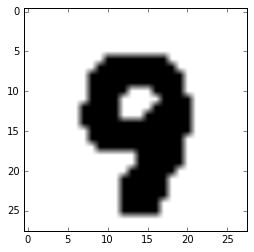

Accuracy of the BernoulliNB model on dev data is 0.826
Visualize Multinomial image


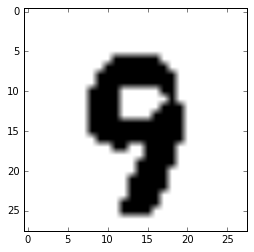

Accuracy of the MultinomialNB model on dev data is 0.834


In [26]:
#set the threshold levels
def P7(first, second):

### STUDENT START ###

    # plot the binarized data
    print "Visualize binarized image"
    bin_mini_train_data = binarize(mini_train_data[1:2])
    x = bin_mini_train_data*255
    array = np.array(x, dtype='uint8')
    array = array.reshape((28, 28))
    plt.imshow(array, cmap='gray_r')
    plt.show()
    
    #binarize the train and dev data for the BernoulliNB, fit the model and print accuracy
    bin_train_data = binarize(train_data)
    bin_dev_data = binarize(dev_data)
    model = BernoulliNB(alpha=1)
    model.fit(bin_train_data, train_labels)
    dev_predicted_labels = model.predict(bin_dev_data)
    accs = accuracy_score(dev_labels, dev_predicted_labels)
    print "Accuracy of the BernoulliNB model on dev data is " + str(accs)
    
    #preprocess the train and dev data to have 3 levels for MultinomialNB
    multi_train_data = np.array(train_data)
    multi_train_data[multi_train_data < first] = 0
    multi_train_data[logical_and(multi_train_data > first, multi_train_data < second)] = 1
    multi_train_data[logical_and(multi_train_data > second, multi_train_data < 1)] = 2
    
    multi_dev_data = np.array(dev_data)
    multi_dev_data[multi_dev_data < first] = 0
    multi_dev_data[logical_and(multi_dev_data > first, multi_dev_data < second)] = 1
    multi_dev_data[logical_and(multi_dev_data > second, multi_dev_data < 1)] = 2
    
    #plot an example of multinomial transformation
    print "Visualize Multinomial image"
    multi_mini_train_data = multi_train_data[1:2]
    x = multi_mini_train_data*255
    array = np.array(x, dtype='uint8')
    array = array.reshape((28, 28))
    plt.imshow(array, cmap='gray_r')
    plt.show()
    
    #fit the MultinomialNB model and print accuracy
    model = MultinomialNB(alpha=1)
    model.fit(multi_train_data, train_labels)
    dev_predicted_labels = model.predict(multi_dev_data)
    accs = accuracy_score(dev_labels, dev_predicted_labels)
    print "Accuracy of the MultinomialNB model on dev data is " + str(accs)

    
### STUDENT END ###

P7(0.5, 0.75)

ANSWER: The multi-class version of the naive bayes model does improve accuracy by a small amount. The multi-class version contains more information than the binary model.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [28]:
def P8(alphas):

### STUDENT START ###

    bin_train_data = binarize(train_data)
    bin_dev_data = binarize(dev_data)
    
    #do a loop of the different alphas and report on the best alpha value. 
    clf = GridSearchCV(BernoulliNB(), alphas)
    clf.fit(bin_train_data, train_labels)
    print("best alpha: {0}".format(clf.best_estimator_.alpha))
        
    model = BernoulliNB(alpha=0.0)
    model.fit(bin_train_data, train_labels)
    dev_predicted_labels = model.predict(bin_dev_data)
    accs = accuracy_score(dev_labels, dev_predicted_labels)
    print "Accuracy of the BernoulliNB model for alpha = " + str(0.0) + " is " + str(accs)


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
P8(alphas)

best alpha: 0.0001
Accuracy of the BernoulliNB model for alpha = 0.0 is 0.099


In [14]:
#print nb.best_params_

ANSWER: The best alpha is 0.0001. The accuracy of the model when alpha = 0 is 0.099. I would expect that without smoothing the accuracy would be closer to alpha = 1. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [29]:
def P9():

### STUDENT END ###
    # fit and print accuracy of GaussianNB without changing parameters
    model = GaussianNB()
    model.fit(train_data, train_labels)
    dev_predicted_labels = model.predict(dev_data)
    accs = accuracy_score(dev_labels, dev_predicted_labels)
    print "Accuracy of the GaussianNB model on dev data where sigma is variance of each feature per class is  " + str(accs)
    
    # set the sigma parameter to 2.35
    clf = GaussianNB().fit(train_data, train_labels)
    for i in range(len(clf.sigma_)):
        for j in range(784):
            clf.sigma_[i][j] = 2.35  #your sigma val you want
    dev_predicted_labels = clf.predict(dev_data)
    accs = accuracy_score(dev_labels, dev_predicted_labels)
    print "Accuracy of the GaussianNB model on dev data where sigma = " + str(2.35) + " is " + str(accs)

### STUDENT END ###

gnb = P9()
gnb

Accuracy of the GaussianNB model on dev data where sigma is variance of each feature per class is  0.571
Accuracy of the GaussianNB model on dev data where sigma = 2.35 is 0.811


ANSWER: Adjusting the sigma significantly boosted the accuracy of the Gaussian model. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

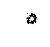

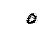

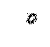

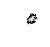

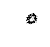

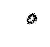

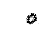

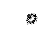

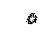

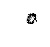

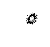

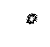

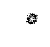

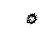

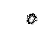

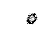

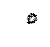

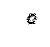

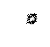

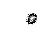

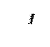

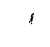

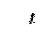

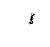

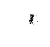

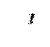

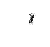

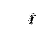

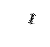

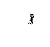

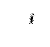

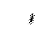

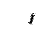

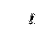

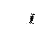

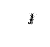

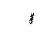

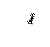

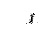

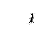

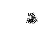

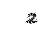

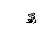

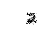

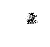

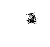

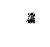

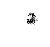

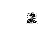

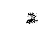

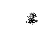

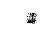

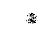

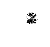

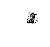

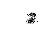

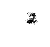

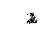

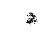

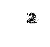

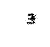

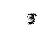

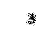

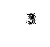

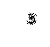

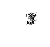

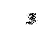

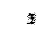

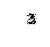

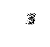

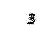

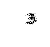

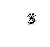

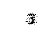

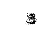

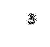

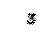

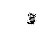

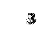

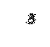

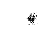

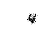

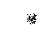

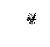

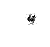

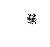

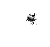

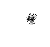

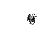

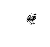

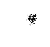

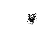

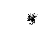

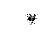

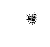

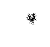

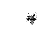

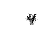

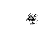

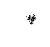

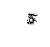

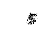

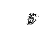

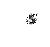

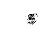

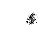

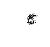

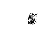

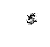

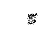

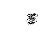

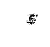

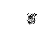

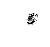

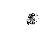

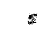

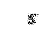

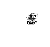

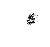

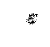

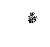

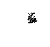

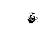

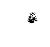

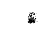

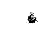

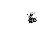

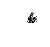

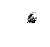

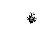

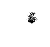

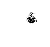

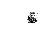

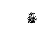

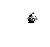

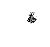

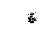

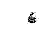

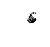

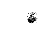

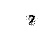

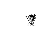

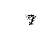

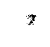

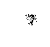

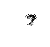

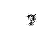

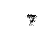

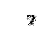

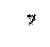

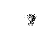

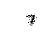

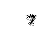

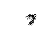

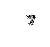

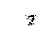

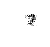

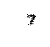

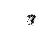

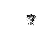

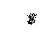

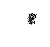

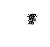

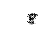

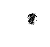

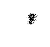

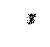

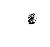

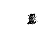

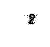

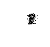

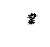

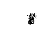

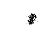

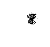

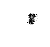

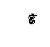

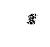

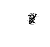

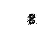

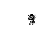

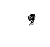

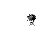

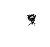

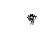

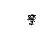

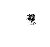

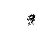

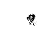

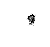

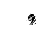

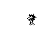

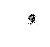

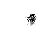

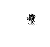

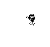

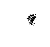

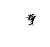

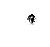

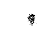

In [31]:
def P10(digit_samples):

### STUDENT START ###
    bin_train_data = binarize(train_data)
    bin_dev_data = binarize(dev_data)
    model = BernoulliNB(alpha=1)
    model = model.fit(bin_train_data, train_labels)
    dev_predicted_labels = model.predict(bin_dev_data)
    
    for i in xrange(10):
        for j in xrange(digit_samples):
            prob = np.exp(model.feature_log_prob_[i])
            for k, pix in enumerate(prob):
                n = np.random.rand()
                if pix > n:
                    prob[k] = 1
                else:
                    prob[k] = 0
            
            x = prob*255
            array = np.array(x, dtype='uint8')
            array = array.reshape((28, 28))
            plot_area = plt.subplot(10,20,i*digit_samples+j+1)
            off = plot_area.set_axis_off()
            plt.imshow(array, cmap='gray_r')
            plt.show()

### STUDENT END ###

P10(20)

ANSWER: The generated digits look pretty close to training digits given the random assiging of each pixel.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [17]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

#couldn't figure this one out
                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()